## Dati da GitHub PCM

In [1]:
import pandas as pd
import seaborn as sns
import datetime
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

pd.options.mode.chained_assignment = None

## Regioni

In [17]:
giorni = (datetime.datetime.today() - datetime.datetime.strptime(('20200224'), '%Y%m%d')).days
datainizio = datetime.datetime.strptime(('20200224'), '%Y%m%d').strftime('%Y%m%d')
listadate = pd.date_range(datainizio, periods=giorni).strftime('%Y%m%d')

In [18]:
link = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-"

In [19]:
dfreg0 = []
for i in listadate:
    print(i)
    dftmp = pd.read_csv(link+i+'.csv',encoding = "ISO-8859-1")
    dftmp['tamponi_positivi'] = round(dftmp['tamponi'] / dftmp['totale_casi'],1)
    dftmp["data_pars"] = dftmp.data.apply(lambda x: datetime.datetime.strptime((x), '%Y-%m-%d %H:%M:%S'))
    dfreg0.append(dftmp)

20200224
20200225
20200226
20200227
20200228
20200229
20200301
20200302
20200303
20200304
20200305
20200306


In [21]:
dfreg = pd.concat(dfreg0)
#del dfreg['Unnamed: 16']
dfreg.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,tamponi_positivi,data_pars
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,inf,2020-02-24 18:00:00
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,NaN,2020-02-24 18:00:00
2,2020-02-24 18:00:00,ITA,4,Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,inf,2020-02-24 18:00:00
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,inf,2020-02-24 18:00:00
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,inf,2020-02-24 18:00:00


In [22]:
dfreg.data.unique()

array(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
       '2020-02-26 18:00:00', '2020-02-27 18:00:00',
       '2020-02-28 18:00:00', '2020-02-29 17:00:00',
       '2020-03-01 17:00:00', '2020-03-02 18:00:00',
       '2020-03-03 18:00:00', '2020-03-04 17:00:00',
       '2020-03-05 17:00:00', '2020-03-06 17:00:00'], dtype=object)

In [23]:
import plotly.express as px

### Tamponi vs Positivi

In [24]:
df = (dfreg.query('denominazione_regione == "Lombardia" or denominazione_regione == "Veneto" or denominazione_regione == "Emilia Romagna"'))

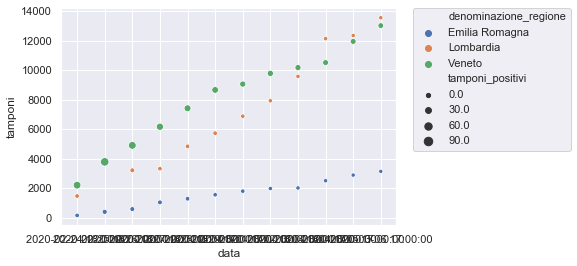

In [25]:
sns.scatterplot(x="data", y="tamponi",
                     hue="denominazione_regione", size="tamponi_positivi",legend = "brief",
                     data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
## PLOTLY INTERACTIVE
### to see it click on theta symbol next to first chunk
fig = px.scatter(df, x="data_pars", y="tamponi", color="denominazione_regione",
                 hover_name="totale_casi",
              size="tamponi_positivi")

fig.show()

### Terapia Intensiva

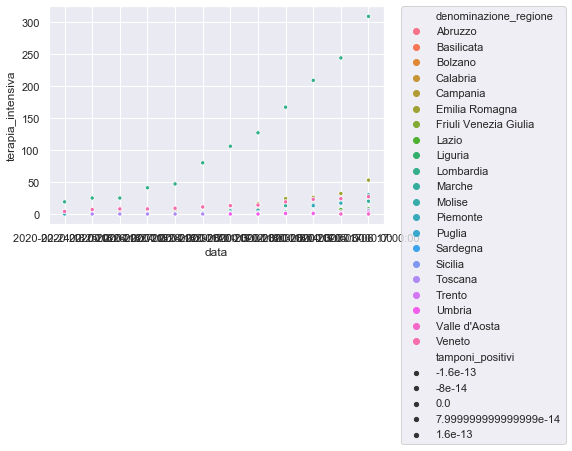

In [27]:
sns.scatterplot(x="data", y="terapia_intensiva",
                     hue="denominazione_regione", size="tamponi_positivi",legend = "brief",
                     data=dfreg)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
## PLOTLY INTERACTIVE
### to see it click on theta symbol next to first chunk
fig = px.scatter(dfreg, x="data_pars", y="terapia_intensiva", color="denominazione_regione",
                 hover_name="totale_casi"#,size="tamponi_positivi"
                )

fig.show()